**Script name:** drc_v1.1\
**Purpose:** This is version 1.1 of lithography structures for layout design rule test with the phidl package.\
**Author:** Yanbing Chen\
**Created date:** 10-07-2024\
**Copyright:** Hacker Fab @ Carnegie Mellon University\
**Contact info:** *yanbing2@andrew.cmu.edu*\
**Notes:** Reference: https://phidl.readthedocs.io/en/latest/geometry_reference.html#Lithography-structures

**TODO** 
1. modify chip aspect ratio to align with the stepper frame ratio 

In [318]:
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.routing as pr
import os
import numpy as np


The pg.litho_steps() function creates lithographic test structure that is useful for measuring resolution of photoresist or electron-beam resists. It provides both positive-tone and negative-tone resolution tests.

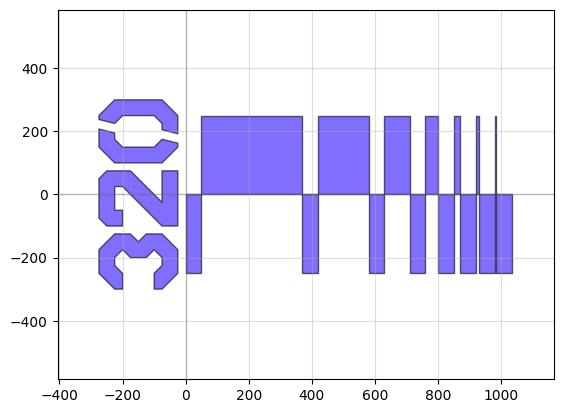

In [319]:
widths = np.array([1,2,4,8,16,32,64])
spacing = 10
height = 100
coef_steps = 5
line_widths =  widths * coef_steps
line_spacing = spacing * coef_steps
height = height * coef_steps
Steps = pg.litho_steps(
        line_widths = line_widths,
        line_spacing = line_spacing,
        height = height,
        layer = 1
        )
qp(Steps) # quickplot the geometry


The pg.litho_calipers() function is used to detect offsets in multilayer fabrication. It creates a two sets of notches on different layers. When an fabrication error/offset occurs, it is easy to detect how much the offset is because both center-notches are no longer aligned.

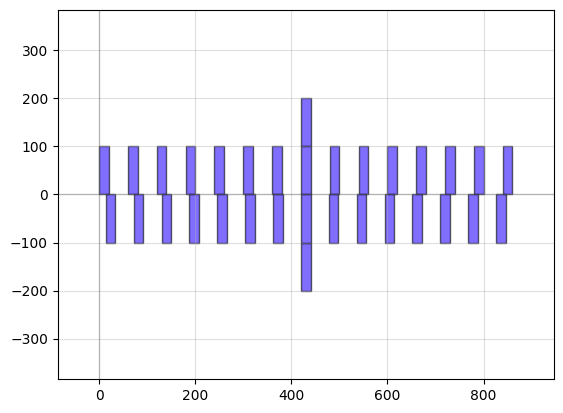

In [320]:
coef_caliper = 20
notch_size = np.array([1,5])*coef_caliper
notch_spacing = 2*coef_caliper
#num_notches = 7*coef_caliper
offset_per_notch = 0.1*coef_caliper
Caliper = pg.litho_calipers(
        notch_size = notch_size,
        notch_spacing = notch_spacing,
        num_notches = 7,
        offset_per_notch = offset_per_notch,
        row_spacing = 0,
        layer1 = 1,
        layer2 = 1)
qp(Caliper) # quickplot the geometry

This ruler structure is useful for measuring distances on a wafer. It features customizable ruler markings



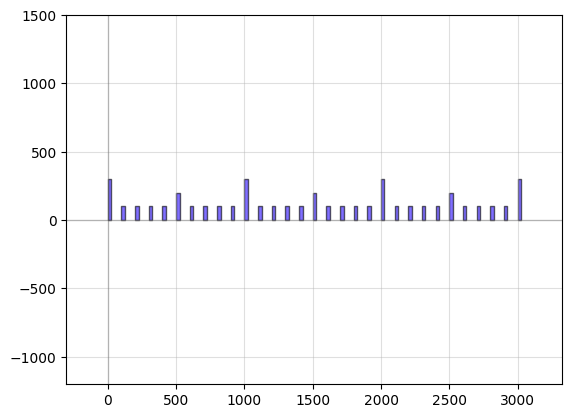

In [321]:
coef_ruler = 100
height = 1 * coef_ruler
width = 0.25 * coef_ruler
spacing = 1 * coef_ruler
Ruler = pg.litho_ruler(
    height = height,
    width = width,
    spacing = spacing,
    scale = [3,1,1,1,1,2,1,1,1,1],
    num_marks = 31,
    layer = 1,
    )

qp(Ruler)

The route_quad() function creates a direct connection between two ports using a quadrilateral polygon. You can adjust the width of the route at the two ports using the width1 and width2 arguments. If these arguments are set to None, the width of the port is used.


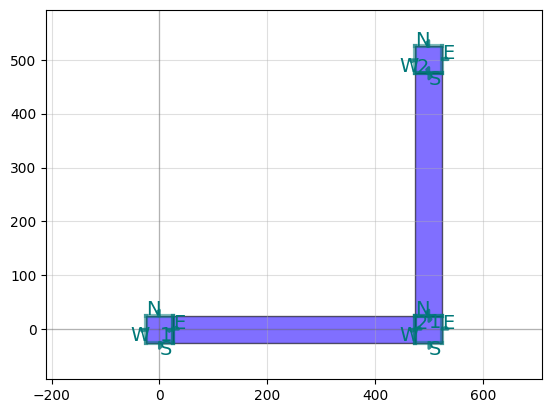

In [322]:
# Use pg.compass() to make 2 boxes with North/South/East/West ports
Box = Device()
c1 = Box << pg.compass(size = [50,50], layer = 1)
c2 = Box << pg.compass(size = [50,50], layer = 1).move([500,0]).rotate(0)
c3 = Box << pg.compass(size = [50,50], layer = 1).move([500,500]).rotate(0)
# Connect the East port of one box to the West port of the other
R1 = Box << pr.route_sharp(c1.ports['E'], c2.ports['W'],
                  width1 = None, width2 = None,  # width = None means use Port width
                  layer = 1)
R2 = Box << pr.route_sharp(c2.ports['N'], c3.ports['S'],
                  width1 = None, width2 = None,  # width = None means use Port width
                  layer = 1)

qp(Box)

pg.import_gds() allows you to easily import external GDSII files. It imports a single cell from the external GDS file and converts it into a PHIDL device.

In [323]:
#D = pg.ellipse()
#D.write_gds('testellipse.gds')
#D = pg.import_gds(filename = 'testellipse.gds', cellname = None, flatten = False)
#qp(D) # quickplot the geometry

## Create Die Box

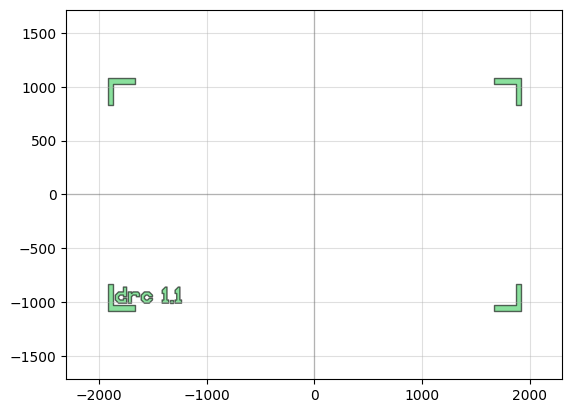

In [324]:
Focus = pg.basic_die(
              size = (3840, 2160), # Size of die
              street_width = 50,   # Width of corner marks for die-sawing
              street_length = 250, # Length of corner marks for die-sawing
              die_name = 'drc 1.1',  # Label text
              text_size = 150,      # Label text size
              text_location = 'SW', # Label text compass location e.g. 'S', 'SE', 'SW'
              layer = 0,
              draw_bbox = False,
              bbox_layer = 99,
              )
qp(Focus)
Focus_lyr1 = pg.copy_layer(Focus, layer = 0, new_layer = 1)


## Complete Die View

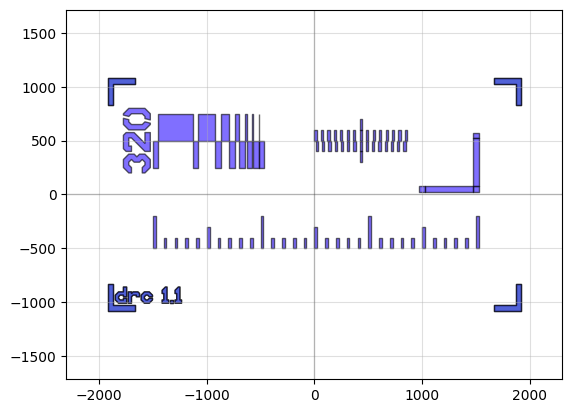

In [325]:
D = pg.Device()

focus_ref = D.add_ref(Focus)
focus_lyr1_ref = D.add_ref(Focus_lyr1)

ruler_ref = D << Ruler.move([-1500,-500])
steps_ref = D << Steps.move([-1500,500])
caliper_ref = D << Caliper.move([0,500])
box_ref = D << Box.move([1000,50])
qp(D)

In [326]:
#D.write_gds('drc_test_v0.gds')
#D = pg.import_gds(filename = 'drc_test_v0.gds', cellname = None, flatten = False)

## Export patterns on each layer

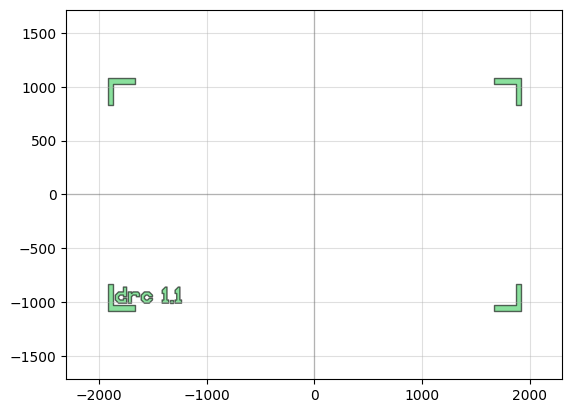

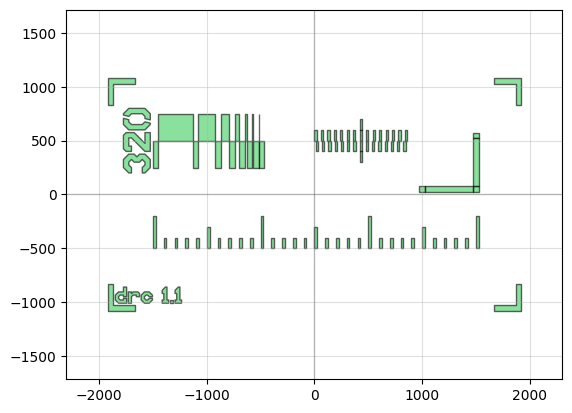

In [327]:
Lyr0 = pg.copy_layer(D, layer = 0, new_layer = 0)
qp(Lyr0)
Lyr1 = pg.copy_layer(D, layer = 1, new_layer = 0)
qp(Lyr1)

#Lyr0.write_svg("drc_test_v0_lyr0.svg", scaling=1, style=None, fontstyle=None, background='#000', pad='5%', precision=None)

imagepath = "images_drc_v1.1/"

# Red light
# bright field
rl_bf_style = {(0, 0): {'fill': 'black','stroke': 'red'}}#{(layer,device):}
rl_bf_background = 'red'
fnm = "lyr1_bf_rl.svg"
Lyr1.write_svg(os.path.join(imagepath,fnm), style=rl_bf_style,background=rl_bf_background)
# dark field
# rl_df_style = {(0, 0): {'fill': 'red','stroke': 'black'}}
df_background = 'black'
# fnm = "lyr1_df_rl.svg"
# Lyr1.write_svg(os.path.join(imagepath,fnm), style=rl_df_style,background=df_background)

# UV light
# bright field
uv_bf_style = {(0, 0): {'fill': 'black','stroke': 'blue'}}
uv_bf_background = 'blue'
fnm = "lyr1_bf_uv.svg"
Lyr1.write_svg(os.path.join(imagepath,fnm), style=uv_bf_style,background=uv_bf_background)
# dark field
# uv_df_style =  {(0, 0): {'fill': 'blue','stroke': 'black'}}
# fnm = "lyr1_df_uv.svg"
# Lyr1.write_svg(os.path.join(imagepath,fnm), style=uv_df_style,background=df_background)

# UV focus
uvfocus = {(0, 0): {'fill': 'blue','stroke': 'black'}}
fnm = "uv_focus.svg"
Lyr0.write_svg(os.path.join(imagepath,fnm), style=uvfocus,background=df_background)# uv focus

